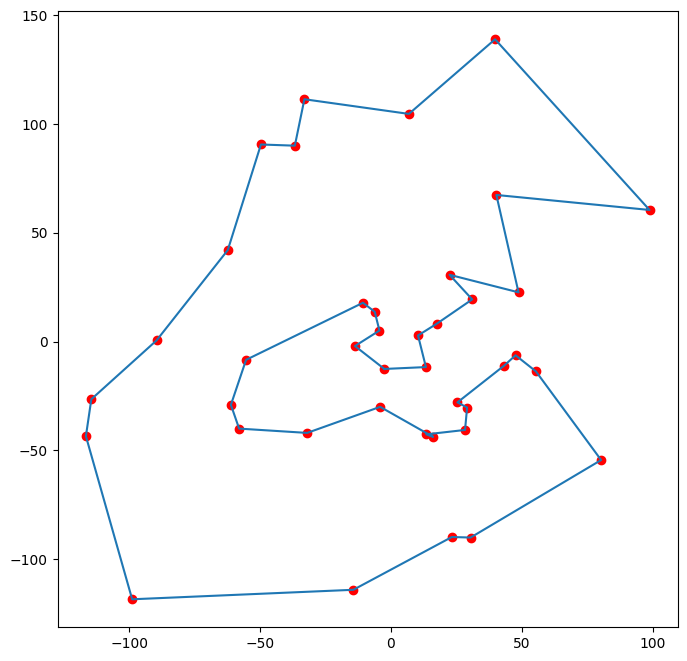

Shortest distance: 1182.9401055320147


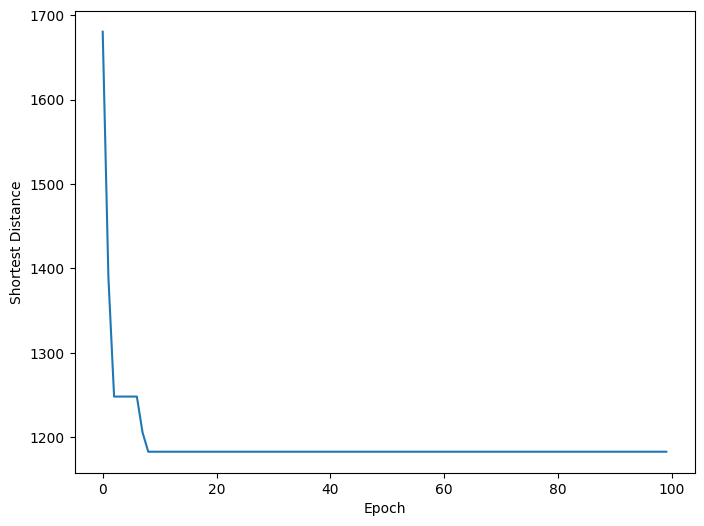

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist, squareform

class AntColonyOptimization:
    def __init__(self, ants, epochs, alpha, beta, rho, Q):
        self.ants = ants
        self.epochs = epochs
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        self.shortest_distances = []  # Add this line

    def optimize(self, cities, positions):
        distance = squareform(pdist(positions))
        eta = 1 / (distance + np.finfo(float).eps)
        tau = np.ones((cities, cities))
        shortest_route = None
        shortest_distance = np.inf
        distances = np.zeros(self.ants)

        for epoch in range(self.epochs):
            routes = np.empty((self.ants, cities))
            routes[:, 0] = np.random.permutation(self.ants) % cities

            for i in range(1, cities):
                for j in range(self.ants):
                    probabilities = tau[int(routes[j, i - 1]), :] ** self.alpha * eta[int(routes[j, i - 1]), :] ** self.beta
                    probabilities[routes[j, :i].astype(int)] = 0
                    probabilities = probabilities / np.sum(probabilities)
                    routes[j, i] = np.random.choice(np.arange(cities), p=probabilities)

            for j in range(self.ants):
                distances[j] = np.sum(np.fromiter((distance[int(routes[j, k]), int(routes[j, k + 1])] for k in range(cities - 1)), float)) + \
                               distance[int(routes[j, 0]), int(routes[j, cities - 1])]

            if np.min(distances) < shortest_distance:
                shortest_distance = np.min(distances)
                shortest_route = routes[np.argmin(distances), :]

            self.shortest_distances.append(shortest_distance)  # Add this line

            d_tau = np.zeros((cities, cities))
            for i in range(self.ants):
                for j in range(cities - 1):
                    d_tau[int(routes[i, j]), int(routes[i, j + 1])] += self.Q / distances[i]
                d_tau[int(routes[i, 0]), int(routes[i, cities - 1])] += self.Q / distances[i]
            tau = (1 - self.rho) * tau + d_tau

        return shortest_route, shortest_distance

aco = AntColonyOptimization(ants=40, epochs=100, alpha=1.4, beta=2.2, rho=0.15, Q=1e6)
cities = 40
positions = 50 * np.random.randn(cities, 2)

route, distance = aco.optimize(cities, positions)

# Plot shortest route
plt.figure(figsize=(8, 8))
plt.scatter(positions[:, 0], positions[:, 1], c='r')
route = np.append(route, route[0])
plt.plot(positions[route.astype(int), 0], positions[route.astype(int), 1])
plt.show()
print(f'Shortest distance: {distance}')

# Plot shortest distances over epochs
plt.figure(figsize=(8, 6))
plt.plot(aco.shortest_distances)
plt.xlabel('Epoch')
plt.ylabel('Shortest Distance')
plt.show()
